# Validation
**Suggested time to spend on exercise**: 22 minutes

In this exercise, we'll dive a bit more deeply into the training and evaluation of a model.

As in the prior exercises, we're working with the California housing data set, to try and predict `medianHouseValue` at the city block level from 1990 census data.

In this exercise, we'll use multiple features (instead of a single feature), and also get familiar with the train / validation / test split methodology.

First off, let's load up and prepare our data.

In [0]:
#@test {"output": "ignore"}

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.google as tf
from IPython import display
from google3.pyglib import gfile
from sklearn import metrics

def preprocess_features(california_housing_dataframe):
  """Prepares input features from California housing data set.

  Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
  Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
  """
  selected_features = california_housing_dataframe[
    ["latitude",
     "longitude",
     "housingMedianAge",
     "totalRooms",
     "totalBedrooms",
     "population",
     "households",
     "medianIncome"]]
  # We want a copy of the original selection so that subsequent changes to it
  # don't affect the original.
  processed_features = selected_features.copy()
  processed_features["roomsPerPerson"] = (
    california_housing_dataframe["totalRooms"] /
    california_housing_dataframe["population"])
  # Feel free to add other synthetic features here.
  return processed_features


def preprocess_targets(california_housing_dataframe):
  """Prepares target features (i.e., labels) from California housing data set.

  Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = pd.DataFrame()
  # Scale the target to be in units of thousands of dollars.
  output_targets["medianHouseValue"] = (
    california_housing_dataframe["medianHouseValue"] / 1000.0)
  return output_targets


# Set the output display to have one digit for decimal places, for display
# readability only.
pd.options.display.float_format = '{:.1f}'.format

# Load in the raw data.  Note that there's a separate test data set that we
# will leave untouched for now.
raw_training_df = pd.read_csv(
  gfile.Open("/placer/prod/home/ami/mlcc/california_housing/v1/train.csv"),
  sep=",")
# Randomize the data before selecting train / validation splits.
raw_training_df = raw_training_df.reindex(np.random.permutation(raw_training_df.index))

# Choose the first 12000 (out of 17000) examples for training.
training_examples = preprocess_features(raw_training_df.head(12000))
training_targets = preprocess_targets(raw_training_df.head(12000))

# Choose the last 5000 (out of 17000) examples for validation.
validation_examples = preprocess_features(raw_training_df.tail(5000))
validation_targets = preprocess_targets(raw_training_df.tail(5000))

# Sanity check that we've done the right thing.
print "Training examples summary:"
display.display(training_examples.describe())
print "Validation examples summary:"
display.display(validation_examples.describe())

print "Training targets summary:"
display.display(training_targets.describe())
print "Validation targets summary:"
display.display(validation_targets.describe())

Training examples summary:


,latitude,longitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,roomsPerPerson
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.6,2627.4,534.9,1422.3,497.2,3.9,2.0
std,2.1,2.0,12.6,2203.3,423.9,1166.5,386.9,1.9,1.1
min,32.5,-124.3,1.0,2.0,1.0,3.0,1.0,0.5,0.0
25%,33.9,-121.8,18.0,1446.0,294.0,783.0,279.0,2.6,1.5
50%,34.2,-118.5,29.0,2105.0,428.0,1162.0,405.0,3.5,1.9
75%,37.7,-118.0,37.0,3124.0,642.0,1704.0,597.0,4.8,2.3
max,42.0,-114.3,52.0,37937.0,6445.0,35682.0,6082.0,15.0,52.0


Validation examples summary:


,latitude,longitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,roomsPerPerson
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.6,-119.6,28.6,2682.8,550.3,1447.0,510.9,3.9,2.0
std,2.1,2.0,12.6,2122.4,415.5,1101.7,378.7,1.9,1.4
min,32.5,-124.2,2.0,32.0,7.0,9.0,2.0,0.5,0.1
25%,33.9,-121.8,18.0,1499.0,306.0,806.0,286.0,2.6,1.5
50%,34.3,-118.5,28.0,2180.0,451.0,1182.5,421.5,3.5,1.9
75%,37.7,-118.0,37.0,3216.0,663.2,1756.2,620.0,4.7,2.3
max,42.0,-114.5,52.0,27700.0,4798.0,15037.0,4490.0,15.0,55.2


Training targets summary:


,medianHouseValue
count,12000.0
mean,206.5
std,115.6
min,15.0
25%,118.8
50%,179.6
75%,263.6
max,500.0


Validation targets summary:


,medianHouseValue
count,5000.0
mean,209.3
std,117.0
min,22.5
25%,121.0
50%,181.7
75%,269.9
max,500.0


### Examine the data
Okay, let's look at the data above.  We have `9` input features that we can use.

**Take a quick skim over the table of values.  Do they pass a quick sanity check?**

Take a look at the data on your own.  Everything look okay?

See how many issues you can spot.  Don't worry if you don't have a background in statistics; common sense is often enough.

After you've had a chance to look over the data yourself, click "run" to reveal some additional thoughts on how to sanity check data.

In [0]:
#@title Run Me for some possible answers

#@test {"output": "ignore"}

print """
      Sanity checking data means checking it against some previous level
      of expectations.

      For some values, like medianHouseValue, we can check to see if these values
      fall within reasonable ranges (keeping in mind this was 1990 data -- not
      today!)

      For other values, like latitude and longitude, we can do a quick check to
      see if these line up with expected values from a quick google search.

      But if you look closely, you might see some oddities.  For example,
      medianIncome is on a scale from about 3 to 15.  Not at all clear what
      this scale refers to -- looks like maybe some log scale?  It's not
      documented anywhere; all we can assume is that higher is more.

      Also, the maximum medianHouseValue is capped at 500,001.  This looks like
      an artificial cap of some kind.

      Finally, our roomsPerPerson feature is generally on a sane scale, with
      a 75-th percentile value of about 2.  But there are some very large values,
      like 18 or 55, which may show some amount of corruption in the data.

      We'll use these features as given for now.  But hopefully these kinds of
      examples can help to build a little intuition about how to sanity check
      data that comes to you from an unknown source.
      """


      Sanity checking data means checking it against some previous level
      of expectations.

      For some values, like medianHouseValue, we can check to see if these values
      fall within reasonable ranges (keeping in mind this was 1990 data -- not
      today!)

      For other values, like latitude and longitude, we can do a quick check to
      see if these line up with expected values from a quick google search.

      But if you look closely, you might see some oddities.  For example,
      medianIncome is on a scale from about 3 to 15.  Not at all clear what
      this scale refers to -- looks like maybe some log scale?  It's not
      documented anywhere; all we can assume is that higher is more.

      Also, the maximum medianHouseValue is capped at 500,001.  This looks like
      an artificial cap of some kind.

      Finally, our roomsPerPerson feature is generally on a sane scale, with
      a 75-th percentile value of about 2.  But there are some very large values

Let's take a close look at two features in particular: **Latitude and Longitude.**  These are geographical coordinates of the city block in question.

This might make a nice visualization -- let's plot `latitude` and `longitude`, and use color to show the `medianHouseValue`.

Run the cell below to show these plots.


[]

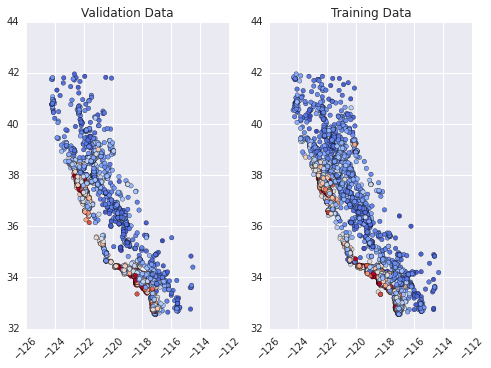

In [0]:
#@test {"output": "ignore"}

# Create a plot that visualizes our data on latitiude and longitude.
plt.subplot(1,2,1)
plt.title("Validation Data")
plt.xticks(rotation=45)
plt.scatter(validation_examples["longitude"],
            validation_examples["latitude"],
            cmap="coolwarm",
            c=validation_targets["medianHouseValue"] / validation_targets["medianHouseValue"].max())
plt.subplot(1,2,2)
plt.title("Training Data")
plt.scatter(training_examples["longitude"],
            training_examples["latitude"],
            cmap="coolwarm",
            c=training_targets["medianHouseValue"] / training_targets["medianHouseValue"].max())
plt.xticks(rotation=45)
display.display(plt.plot())



Wait a second ... this should have given us a nice map of the state of California, with red showing up in expensive areas like the San Francisco and Los Angeles.

And it sort of does, compared to a [real map](https://www.google.com/maps/place/California/@37.1870174,-123.7642688,6z/data=!3m1!4b1!4m2!3m1!1s0x808fb9fe5f285e3d:0x8b5109a227086f55), except that the validation data only has Northern (Western) California, and the training data only has Southern (Eastern) California.

Clearly, something is amiss here.

**Go back up and look at the sanity check data again.**

Do you see any other differences in the distributions of features or targets between the training and validation data?

In [0]:
#@title Run Me to reveal the key issue

#@test {"output": "ignore"}

print """
         Looking at the tables of summary stats above, it's easy to wonder how
         anyone would do a useful sanity check.  What's the right 75-th percentile
         value for totalRooms per city block?

         The key thing to notice is that for any given feature or column, the
         distribution of values between the train and validation splits should
         be roughly equal.

         You'll recall that this is one of the three key points from the ML
         Fine Print: our data splits should all be drawn from the same distribution.

         The fact that this is not the case is a real worry, and shows that we
         likely have a fault in the way that our train and validation split
         was created.
         """


         Looking at the tables of summary stats above, it's easy to wonder how
         anyone would do a useful sanity check.  What's the right 75-th percentile
         value for totalRooms per city block?

         The key thing to notice is that for any given feature or column, the
         distribution of values between the train and validation splits should
         be roughly equal.

         You'll recall that this is one of the three key points from the ML
         Fine Print: our data splits should all be drawn from the same distribution.

         The fact that this is not the case is a real worry, and shows that we
         likely have a fault in the way that our train and validation split
         was created.
         


### Task 1:  Go back up to the data importing and pre-processing code, and see if you spot any bugs there.
If you do, go ahead and fix the bug.  Don't spend more than a minute or two looking.


In [0]:
#@title Run Me for a hint

#@test {"output": "ignore"}

print """
         Take a look at how the data is randomized when it's read in.

         If we didn't randomize the data properly before creating training and
         validation splits, then we'd be in trouble if the data was given to
         us in some sorted order.
      """


         Take a look at how the data is randomized when it's read in.

         If we didn't randomize the data properly before creating training and
         validation splits, then we'd be in trouble if the data was given to
         us in some sorted order.
      


When you've found and fixed the issue, re-run latitude / longitude plotting cell above and confirm that our sanity checks look better.

By the way, there's an important lesson here.

**Debugging in ML is often *data debugging* rather than code debugging.**

If the data is wrong, even the most advanced ML code can't save things.

### Task 2: Train and evaluate a model.

**Spend 5 minutes or so trying different hyperparameter settings.  Try to get the best validation performance you can.**

Go ahead and write some code to set up a linear_regressor, using the [LinearRegressor](https://cs.corp.google.com/search/?q=package:piper+symbol:^LinearRegressor$) interface provided by the TensorFlow Estimators library.

It's okay to use the code in the previous exercises, but you'll want to call `fit()` and `predict()` on the appropriate data sets.

Using multiple input features instead of a single feature doesn't require anything special; the Estimators interface accepts Pandas `DataFrame` objects.

If the `DataFrame` has multiple features defined (as ours does) these will all be used.

Compare the losses on training data and validation data.

With a single raw feature, our best root mean squared error (RMSE) was of about 180.

See how much better you can do now that we can use multiple features.

Use some of the sanity-checking methods we've looked at before.  These might include:

   * comparing distributions of predictions and actual target values

   * creating a scatter plot of predictions vs. target values

   * creating two scatter plots of validation data using `latitude` and `longitude`:
      * one plot mapping color to actual target `medianHouseValue`
      * a second plot mapping color to predicted `medianHouseValue` for side-by-side comparison.


In [0]:
#
# Your code here: train a model using LinearRegressor.
#

#@test {"skip": true}

LEARNING_RATE = 0.005  #@param
STEPS = 500  #@param
BATCH_SIZE = 5  #@param
periods = 10
steps_per_period = STEPS / periods

my_feature = "roomsPerPerson"

#
# Your code here
#


my_feature_column = training_examples[my_feature]
my_label = "medianHouseValue"
targets = training_examples[my_label]

# Create a linear regressor object.
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(
  my_feature_column)
linear_regressor = tf.contrib.learn.LinearRegressor(
  feature_columns=feature_columns,
  optimizer=tf.GradientDescentOptimizer(learning_rate=LEARNING_RATE),
  gradient_clip_norm=5.0
)


# Train the model, but do so inside a loop so that we can periodically assess
# loss metrics.
print "Training model..."
print "RMSE (on training data):"
root_mean_squared_errors = []
for period in range (0, periods):
  # Train the model, starting from the prior state.
  linear_regressor.fit(
    my_feature_column,
    targets,
    steps=steps_per_period,
    batch_size=BATCH_SIZE
  )
  # Take a break and compute predictions.
  predictions = linear_regressor.predict(my_feature_column)
  # Compute loss.
  root_mean_squared_error = math.sqrt(
    metrics.mean_squared_error(predictions, targets))
  # Occasionally print the current loss.
  print "  period %02d : %0.2f" % (period, root_mean_squared_error)
  # Add the loss metrics from this period to our list.
  root_mean_squared_errors.append(root_mean_squared_error)
  # Finally, track the weights and biases over time.
  # Apply some math to ensure that the data and line are plotted neatly.
  y_extents = np.array([0, sample[my_label].max()])
  x_extents = (y_extents - linear_regressor.bias_) / linear_regressor.weights_[0]
  x_extents = np.minimum(x_extents, sample[my_feature].max())
  y_extents = linear_regressor.weights_[0] * x_extents + linear_regressor.bias_
  plt.plot(x_extents, y_extents, color=colors[period])
print "Model training finished."

# Output a graph of loss metrics over periods.
plt.subplot(1, 2, 2)
plt.ylabel('RMSE')
plt.xlabel('Periods')
plt.title("Root Mean Squared Error vs. Periods")
plt.tight_layout()
display.display(plt.plot(root_mean_squared_errors))

calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
display.display(calibration_data.describe())

print ("Final RMSE (on training data): %0.2f" % root_mean_squared_error)

Training model...
RMSE (on training data):
  period 00 : 215.50
  period 01 : 197.45
  period 02 : 182.85
  period 03 : 173.09
  period 04 : 167.36
  period 05 : 165.01
  period 06 : 164.78
  period 07 : 165.32
  period 08 : 166.10
  period 09 : 167.03
Model training finished.


,predictions,targets
count,12000.0,8502.0
mean,156.3,197.5
std,123.0,111.4
min,5.0,15.0
25%,90.4,140.8
50%,127.9,226.9
75%,184.3,nan
max,2099.0,500.0


Final RMSE (on training data): 167.03
Final RMSE (on validation data): 167.35


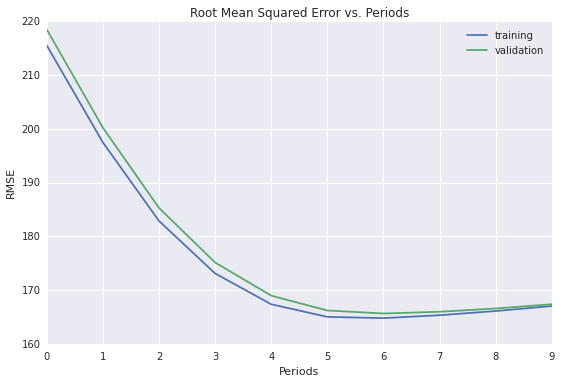

In [0]:
#@title To view a possible solution, toggle Form

#@test {"output": "ignore"}

# Solution: this is just one possible setting; there may be other combinations
# of parameter settings that also give good results.  Note that in general,
# this exercise isn't about finding the One Best setting, but rather about
# getting the experience of exploring parameter settings.

LEARNING_RATE = 0.00003
STEPS = 500
BATCH_SIZE = 5
periods = 10
steps_per_period = STEPS / periods

# Create a linear regressor object.
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(
  training_examples)
linear_regressor = tf.contrib.learn.LinearRegressor(
  feature_columns=feature_columns,
  optimizer=tf.GradientDescentOptimizer(learning_rate=LEARNING_RATE),
  gradient_clip_norm=5.0
)

# Train the model, but do so inside a loop so that we can periodically assess
# loss metrics.
training_rmse = []
validation_rmse = []
print "Training model..."
print "RMSE (on training data):"
for period in range (0, periods):
  # Train the model, starting from the prior state.
  linear_regressor.fit(
    training_examples,
    training_targets,
    steps=steps_per_period,
    batch_size=BATCH_SIZE
  )
  # Take a break and compute predictions.
  training_predictions = linear_regressor.predict(training_examples)
  # Also compute predictions on the validation data.
  validation_predictions = linear_regressor.predict(validation_examples)
  # Compute training and validation loss.
  training_root_mean_squared_error = math.sqrt(
    metrics.mean_squared_error(training_predictions, training_targets))
  validation_root_mean_squared_error = math.sqrt(
    metrics.mean_squared_error(validation_predictions, validation_targets))
  # Occasionally print the current loss.
  print "  period %02d : %0.2f" % (period, training_root_mean_squared_error)
  # Add the loss metrics from this period to our lists.
  training_rmse.append(training_root_mean_squared_error)
  validation_rmse.append(validation_root_mean_squared_error)
print "Model training finished."

# Output a graph of loss metrics over periods.
plt.ylabel("RMSE")
plt.xlabel("Periods")
plt.title("Root Mean Squared Error vs. Periods")
plt.tight_layout()
plt.plot(training_rmse, label="training")
plt.plot(validation_rmse, label="validation")
plt.legend()

calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(training_predictions)
calibration_data["targets"] = training_targets
display.display(calibration_data.describe())

print "Final RMSE (on training data): %0.2f" % training_root_mean_squared_error
print "Final RMSE (on validation data): %0.2f" % validation_root_mean_squared_error

### Task 3: Evaluate on test data.

**In the cell below, load in the test data set and evaluate your model on it.**

We've done a lot of iteration on our validation data.  Let's make sure we haven't overfit to the pecularities of that particular sample.

Test data set is located here: `/placer/prod/home/ami/mlcc/california_housing/v1/test.csv`

How does your test performance compare to the validation performance?  What does this say about the generalization performance of your model?

In [0]:
#
# Your code here: evaluate the model at Task 2 on test data.
#

raw_test_df = pd.read_csv(
  gfile.Open("/placer/prod/home/ami/mlcc/california_housing/v1/test.csv"),
  sep=",")

test_examples = preprocess_features(raw_test_df)
test_targets = preprocess_targets(raw_test_df)

test_predictions = linear_regressor.predict(test_examples)
  # Compute training and validation loss.
test_root_mean_squared_error = math.sqrt(
    metrics.mean_squared_error(test_predictions, test_targets))
  # Occasionally print the current loss.
print "  : %0.2f" % (test_root_mean_squared_error)


  : 160.57


In [0]:
#@title To view a possible solution, toggle Form

#@test {"output": "ignore"}

#
# Solution: Similarly to what the code above does, we just need to load the
# appropriate data file, preprocess it and use predict/mean_squared_error.
#
raw_test_df = pd.read_csv(
  gfile.Open("/placer/prod/home/ami/mlcc/california_housing/v1/test.csv"),
  sep=",")
# Note that we don't have to randomize the test data, since will use all records.

test_examples = preprocess_features(raw_test_df)
test_targets = preprocess_targets(raw_test_df)

# Simply pass the features to the trained model and calculate the error.
test_predictions = linear_regressor.predict(test_examples)
root_mean_squared_error = math.sqrt(
    metrics.mean_squared_error(test_predictions, test_targets))

print "Final RMSE (on test data): %0.2f" % root_mean_squared_error

Final RMSE (on test data): 160.57
